In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

import os

# Pre-processing

In [32]:
testPath = 'dataset/output/test/'
trainPath = 'dataset/output/train/'

testX = []
trainX = []

testY = []
trainY = []

fruits = os.listdir(testPath)
for fruit in fruits:
    images = os.listdir(testPath + "/" + fruit)
    for img in images:
        image = cv2.imread(testPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, (120,120), interpolation = cv2.INTER_AREA)
        testX.append(image)
        testY.append(fruit)
        
fruits = os.listdir(trainPath)
for fruit in fruits:
    images = os.listdir(trainPath + "/" + fruit)
    for img in images:
        image = cv2.imread(trainPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, (120,120), interpolation = cv2.INTER_AREA)
        trainX.append(image)
        trainY.append(fruit)

testX = np.array(testX)
trainX = np.array(trainX)

testY = np.array(testY)
trainY = np.array(trainY)

### To GrayScale

In [33]:
def grayScale(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    return gray

In [34]:
for i in range(len(testX)):
    testX[i] = grayScale(testX[i])

In [35]:
for i in range(len(trainX)):
    trainX[i] = grayScale(trainX[i])

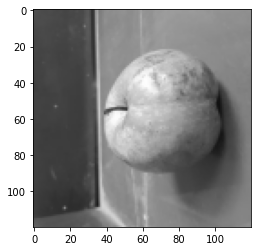

In [36]:
plt.imshow(testX[9])

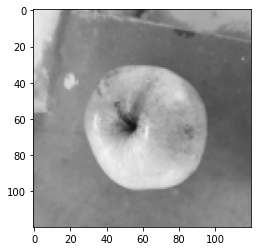

In [38]:
plt.imshow(trainX[9])

### Proccessing the image

In [39]:
# convert from integers to floats and normalize to range 0-1
norm_trainX = trainX.astype('float32')/255.0
norm_testX = testX.astype('float32')/255.0

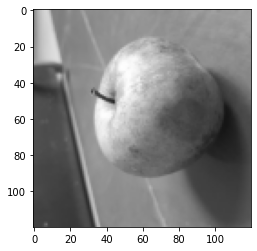

In [40]:
plt.imshow(norm_testX[10])

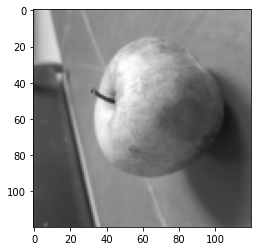

In [41]:
plt.imshow(testX[10])

In [43]:
norm_testX.shape

(1200, 120, 120, 3)

# CNN Model

In [57]:
inputs = Input(shape = (128, 128, 3))

In [58]:
conv1 = Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(120, 120, 3))(inputs)

In [59]:
maxP1 = MaxPooling2D(pool_size=2, strides=2)(conv1)

In [60]:
conv2 = Conv2D(filters=32, kernel_size=3, activation='relu')(maxP1)

In [61]:
maxP2 = MaxPooling2D(pool_size=2, strides=2)(conv2)

In [62]:
flattern = Flatten()(maxP2)

In [63]:
dense1 = Dense(units=32, activation='relu')(flattern)

In [64]:
output = Dense(units=3, activation='softmax')(dense1)

In [65]:
model = Model(inputs=inputs, outputs=output)

In [66]:
norm_trainX[0].shape

(120, 120, 3)

In [68]:
#Sequential
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(120, 120, 3))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

SyntaxError: invalid syntax (<ipython-input-68-2b9a7f837f0a>, line 6)

In [67]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
model.fit(x = norm_trainX, y = trainY, epochs = 10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 128, 128, 3), found shape=(32, 120, 120, 3)


In [ ]:
model.save('food_grading')

In [ ]:
import numpy as np
from keras.preprocessing import image
classes = training_set.class_indices
print(classes)
d = dict()
for i in classes.keys():
    d[classes[i]] = i
print(d)
def testModel(path):
    test_image = image.load_img(path, target_size = (128,128))
    plt.imshow(test_image)
    test_image_array = image.img_to_array(test_image)
    test_image_array = np.expand_dims(test_image_array, axis=0)
    result = model.predict(test_image_array)
    print(result[0])
    pr = np.argmax(result[0])
    prediction = d[pr]
    print(prediction)

In [ ]:
testModel('dataset/single_pred/apple_or_banana1.jfif')

In [ ]:
testModel('dataset/single_pred/apple_or_banana2.png')

In [ ]:
testModel('dataset/single_pred/apple_or_banana3.jfif')

In [ ]:
testModel('dataset/single_pred/apple_or_banana4.jfif')

In [ ]:
testModel('dataset/single_pred/apple_or_banana5.png')

In [ ]:
testModel('dataset/single_pred/apple_or_banana6.jpg')

In [ ]:
testModel('dataset/single_pred/apple_or_banana7.jfif')

In [ ]:
testModel('dataset/single_pred/apple_or_banana8.png')